<a href="https://colab.research.google.com/github/AyushXRane/Basketball-Model-/blob/main/Basketball_ELO_Ranking_and_Game_Outcome_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dictionary = pd.read_csv('/content/drive/MyDrive/Wharton/DataDictionary.csv')
Eastgames =pd.read_csv('/content/drive/MyDrive/Wharton/EastGames.csv')
games = pd.read_csv('/content/drive/MyDrive/Wharton/games_2022.csv')
groups = pd.read_csv('/content/drive/MyDrive/Wharton/Team Region Groups.csv')

In [ ]:
pd.set_option('display.max_columns', None)


In [ ]:
games.isnull()

,game_id,game_date,team,FGA_2,FGM_2,FGA_3,FGM_3,FTA,FTM,AST,BLK,STL,TOV,TOV_team,DREB,OREB,F_tech,F_personal,team_score,opponent_team_score,largest_lead,notD1_incomplete,OT_length_min_tot,rest_days,attendance,tz_dif_H_E,prev_game_dist,home_away,home_away_NS,travel_dist
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10433,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
10434,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
10435,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
10436,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [ ]:
groups

,team,region
0,alabama_crimson_tide,North
1,alabama_state_lady_hornets,North
2,arkansas_razorbacks,North
3,belmont_bruins,North
4,charleston_cougars,North
...,...,...
134,ut_arlington_mavericks,West
135,utah_utes,West
136,utah_valley_wolverines,West
137,washington_state_cougars,West


In [ ]:
games


,game_id,game_date,team,FGA_2,FGM_2,FGA_3,FGM_3,FTA,FTM,AST,BLK,STL,TOV,TOV_team,DREB,OREB,F_tech,F_personal,team_score,opponent_team_score,largest_lead,notD1_incomplete,OT_length_min_tot,rest_days,attendance,tz_dif_H_E,prev_game_dist,home_away,home_away_NS,travel_dist
0,game_2022_2011,2021-12-30,georgia_lady_bulldogs,61,27,11,5,6,3,14,7,7,18,0,25,11,0,18,62,68,1.0,False,NaN,9.0,3241.0,0.0,0.0,home,1,0.0
1,game_2022_2011,2021-12-30,lsu_tigers,61,28,11,4,15,8,15,2,15,14,2,25,11,0,7,68,62,14.0,False,NaN,3.0,3241.0,0.0,824.0,away,-1,824.0
2,game_2022_2012,2021-12-30,missouri_tigers,58,25,15,7,16,13,10,1,4,8,1,31,6,0,11,70,69,8.0,False,5.0,8.0,6139.0,0.0,371.0,home,1,0.0
3,game_2022_2012,2021-12-30,south_carolina_gamecocks,76,29,21,6,9,5,15,8,3,8,0,27,20,0,15,69,70,6.0,False,5.0,9.0,6139.0,0.0,1154.0,away,-1,1154.0
4,game_2022_2013,2021-12-30,tennessee_lady_volunteers,56,24,15,4,15,10,16,8,5,15,1,34,12,0,13,62,44,19.0,False,NaN,3.0,8124.0,0.0,0.0,home,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10433,game_2022_4795,2022-03-01,xavier_musketeers,56,21,12,2,12,9,15,3,4,10,0,25,8,0,12,53,74,0.0,False,NaN,2.0,156.0,0.0,0.0,home,1,0.0
10434,game_2022_4968,2022-03-04,harvard_crimson,69,34,39,15,10,2,20,2,13,6,0,28,10,0,8,85,52,40.0,False,NaN,13.0,373.0,0.0,378.0,away,-1,173.0
10435,game_2022_4968,2022-03-04,dartmouth_big_green,58,21,26,6,7,4,7,1,4,21,2,29,10,0,8,52,85,3.0,False,NaN,6.0,373.0,0.0,479.0,home,1,0.0
10436,game_2022_5067,2022-03-06,harvard_crimson,73,19,35,6,10,9,11,3,7,11,0,23,18,0,20,53,73,0.0,False,NaN,2.0,757.0,0.0,173.0,home,1,0.0


In [ ]:
games['win'] = (games['team_score'] > games['opponent_team_score']).astype(int)
games['loss'] = (games['team_score'] < games['opponent_team_score']).astype(int)
games['pts diff'] = games['team_score'] - games['opponent_team_score']
games['FGM'] = games['FGM_2'] + games['FGM_3']
games['FGA'] = games['FGA_2'] + games['FGA_3']
games['efg'] =  (games['FGM'] + 0.5 * games['FGM_3'])/games['FGA']
games['tsp'] = (games['team_score'])/(2*(games['FGA']+(0.44*games['FTA'])))


#Creates new columns for win/loss and point differential


In [ ]:
games

,game_id,game_date,team,FGA_2,FGM_2,FGA_3,FGM_3,FTA,FTM,AST,BLK,STL,TOV,TOV_team,DREB,OREB,F_tech,F_personal,team_score,opponent_team_score,largest_lead,notD1_incomplete,OT_length_min_tot,rest_days,attendance,tz_dif_H_E,prev_game_dist,home_away,home_away_NS,travel_dist,win,loss,pts diff,FGM,FGA,efg,tsp
0,game_2022_2011,2021-12-30,georgia_lady_bulldogs,61,27,11,5,6,3,14,7,7,18,0,25,11,0,18,62,68,1.0,False,NaN,9.0,3241.0,0.0,0.0,home,1,0.0,0,1,-6,32,72,0.479167,0.415327
1,game_2022_2011,2021-12-30,lsu_tigers,61,28,11,4,15,8,15,2,15,14,2,25,11,0,7,68,62,14.0,False,NaN,3.0,3241.0,0.0,824.0,away,-1,824.0,1,0,6,32,72,0.472222,0.432570
2,game_2022_2012,2021-12-30,missouri_tigers,58,25,15,7,16,13,10,1,4,8,1,31,6,0,11,70,69,8.0,False,5.0,8.0,6139.0,0.0,371.0,home,1,0.0,1,0,1,32,73,0.486301,0.437281
3,game_2022_2012,2021-12-30,south_carolina_gamecocks,76,29,21,6,9,5,15,8,3,8,0,27,20,0,15,69,70,6.0,False,5.0,9.0,6139.0,0.0,1154.0,away,-1,1154.0,0,1,-1,35,97,0.391753,0.341719
4,game_2022_2013,2021-12-30,tennessee_lady_volunteers,56,24,15,4,15,10,16,8,5,15,1,34,12,0,13,62,44,19.0,False,NaN,3.0,8124.0,0.0,0.0,home,1,0.0,1,0,18,28,71,0.422535,0.399485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10433,game_2022_4795,2022-03-01,xavier_musketeers,56,21,12,2,12,9,15,3,4,10,0,25,8,0,12,53,74,0.0,False,NaN,2.0,156.0,0.0,0.0,home,1,0.0,0,1,-21,23,68,0.352941,0.361627
10434,game_2022_4968,2022-03-04,harvard_crimson,69,34,39,15,10,2,20,2,13,6,0,28,10,0,8,85,52,40.0,False,NaN,13.0,373.0,0.0,378.0,away,-1,173.0,1,0,33,49,108,0.523148,0.378114
10435,game_2022_4968,2022-03-04,dartmouth_big_green,58,21,26,6,7,4,7,1,4,21,2,29,10,0,8,52,85,3.0,False,NaN,6.0,373.0,0.0,479.0,home,1,0.0,0,1,-33,27,84,0.357143,0.298576
10436,game_2022_5067,2022-03-06,harvard_crimson,73,19,35,6,10,9,11,3,7,11,0,23,18,0,20,53,73,0.0,False,NaN,2.0,757.0,0.0,173.0,home,1,0.0,0,1,-20,25,108,0.259259,0.235765


In [ ]:
games.columns

Index(['game_id', 'game_date', 'team', 'FGA_2', 'FGM_2', 'FGA_3', 'FGM_3',
       'FTA', 'FTM', 'AST', 'BLK', 'STL', 'TOV', 'TOV_team', 'DREB', 'OREB',
       'F_tech', 'F_personal', 'team_score', 'opponent_team_score',
       'largest_lead', 'notD1_incomplete', 'OT_length_min_tot', 'rest_days',
       'attendance', 'tz_dif_H_E', 'prev_game_dist', 'home_away',
       'home_away_NS', 'travel_dist', 'win', 'loss', 'pts diff', 'FGM', 'FGA',
       'efg', 'tsp'],
      dtype='object')

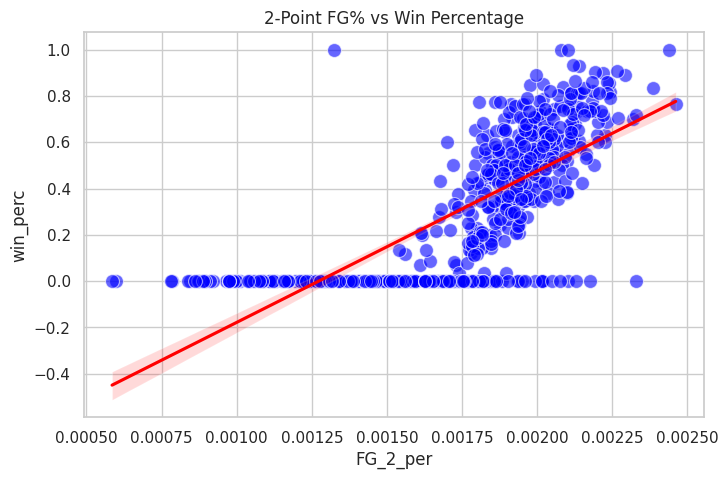

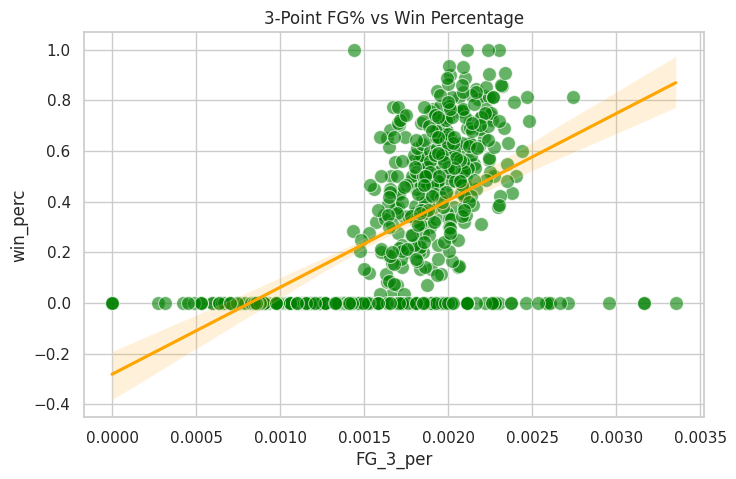

In [ ]:
league_table_2022 = games.groupby('team').agg(
    {
        'FGA_2': 'sum',
        'FGA_3': 'sum',
        'FGM_2': 'sum',
        'FGM_3': 'sum',
        'FTM': 'sum',
        'FTA': 'sum',
        'win': 'sum',
        'loss': 'sum',
        'team_score': 'sum',
        'opponent_team_score': 'sum'
    }
).reset_index()

# Rename aggregated columns for consistency if needed
league_table_2022 = league_table_2022.rename(columns={
    'team_score': 'total_score',
    'opponent_team_score': 'opps_total_score',
    'win': 'wins',
    'loss': 'loss'
})

# Add computed columns
# Calculate FG percentages before using them
league_table_2022['FG%_2'] = league_table_2022['FGM_2'] / league_table_2022['FGA_2']
league_table_2022['FG%_3'] = league_table_2022['FGM_3'] / league_table_2022['FGA_3']


league_table_2022['FG_2_per'] = league_table_2022['FG%_2'] / league_table_2022['FG%_2'].sum()
league_table_2022['FG_3_per'] = league_table_2022['FG%_3'] / league_table_2022['FG%_3'].sum()
league_table_2022['win_perc'] = league_table_2022['wins'] / (league_table_2022['wins'] + league_table_2022['loss'])

# read in team region groups


# Merge team regions with aggregated data
league_table_2022 = pd.merge(league_table_2022, groups, on='team', how='left')

# Data Visualization
# visualization: shooting performance vs. win percentage
sns.set(style="whitegrid")

# 2 point FG% vs Win Percentage
plt.figure(figsize=(8, 5))
sns.scatterplot(data=league_table_2022, x='FG_2_per', y='win_perc', color='blue', alpha=0.6, s=100)
sns.regplot(data=league_table_2022, x='FG_2_per', y='win_perc', scatter=False, color='red')
plt.title("2-Point FG% vs Win Percentage")
plt.show()

# 3 point FG% vs Win Percentage
plt.figure(figsize=(8, 5))
sns.scatterplot(data=league_table_2022, x='FG_3_per', y='win_perc', color='green', alpha=0.6, s=100)
sns.regplot(data=league_table_2022, x='FG_3_per', y='win_perc', scatter=False, color='orange')
plt.title("3-Point FG% vs Win Percentage")
plt.show()

# save results
league_table_2022.to_csv("league_table_2022.csv", index=False)


In [ ]:
league_table_2022
#Summary of stats for each team

,team,FGA_2,FGA_3,FGM_2,FGM_3,FTM,FTA,wins,loss,total_score,opps_total_score,FG%_2,FG%_3,FG_2_per,FG_3_per,win_perc,region
0,abilene_christian_wildcats,1773,811,766,287,397,524,17,13,2216,1998,0.432036,0.353884,0.002107,0.002242,0.566667,West
1,academy_of_art_urban_knights,126,49,41,8,10,21,0,2,100,131,0.325397,0.163265,0.001587,0.001034,0.000000,NaN
2,agnes_scott_college_scotties,101,24,20,4,6,13,0,2,50,219,0.198020,0.166667,0.000966,0.001056,0.000000,NaN
3,air_force_falcons,1897,527,723,156,322,436,18,13,1924,1803,0.381128,0.296015,0.001859,0.001875,0.580645,West
4,akron_zips,1624,525,695,168,330,475,17,11,1888,1868,0.427956,0.320000,0.002087,0.002027,0.607143,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,xavier_la_gold_rush,100,24,27,6,25,31,0,2,85,139,0.270000,0.250000,0.001317,0.001584,0.000000,NaN
560,xavier_musketeers,1777,311,701,81,387,519,9,21,1870,2185,0.394485,0.260450,0.001924,0.001650,0.300000,NaN
561,yale_bulldogs,1525,548,582,168,248,368,16,11,1580,1534,0.381639,0.306569,0.001861,0.001942,0.592593,NaN
562,young_harris_college_mountain_lions,54,14,23,5,7,12,0,1,58,91,0.425926,0.357143,0.002077,0.002263,0.000000,NaN


In [ ]:
league_table_2022.loc[(league_table_2022["team"]     == "south_dakota_coyotes")]


,team,FGA_2,FGA_3,FGM_2,FGM_3,FTM,FTA,wins,loss,total_score,opps_total_score,FG%_2,FG%_3,FG_2_per,FG_3_per,win_perc,region
420,south_dakota_coyotes,1796,576,794,190,316,420,25,5,2094,1592,0.442094,0.329861,0.002156,0.00209,0.833333,West


In [ ]:
leaderBoard = league_table_2022.sort_values(by='wins', ascending=False)
leaderBoard.head(20)

,team,FGA_2,FGA_3,FGM_2,FGM_3,FTM,FTA,wins,loss,total_score,opps_total_score,FG%_2,FG%_3,FG_2_per,FG_3_per,win_perc,region
417,south_carolina_gamecocks,1908,468,829,148,404,602,29,2,2210,1602,0.434486,0.316239,0.002119,0.002003,0.935484,North
307,nc_state_wolfpack,2006,642,932,237,343,454,29,3,2444,1825,0.464606,0.369159,0.002266,0.002339,0.906250,NaN
441,stanford_cardinal,1912,633,859,224,345,507,28,3,2287,1763,0.449268,0.353870,0.002191,0.002242,0.903226,West
150,florida_gulf_coast_eagles,1844,1049,809,346,294,446,27,2,2258,1650,0.438720,0.329838,0.002139,0.002090,0.931034,North
31,baylor_bears,2016,631,927,221,466,638,27,6,2541,1996,0.459821,0.350238,0.002242,0.002219,0.818182,West
235,liberty_flames,1688,529,768,168,306,452,27,3,2010,1554,0.454976,0.317580,0.002219,0.002012,0.900000,NaN
504,unlv_lady_rebels,1947,584,881,209,447,604,26,6,2418,2063,0.452491,0.357877,0.002207,0.002267,0.812500,West
267,massachusetts_minutewomen,1991,592,873,193,350,515,26,6,2289,1945,0.438473,0.326014,0.002138,0.002065,0.812500,NaN
471,toledo_rockets,1802,641,786,202,397,536,26,4,2171,1803,0.436182,0.315133,0.002127,0.001996,0.866667,South
464,texas_longhorns,1982,433,859,155,451,645,26,6,2324,1813,0.433401,0.357968,0.002114,0.002268,0.812500,West


In [ ]:
league_table_2022

In [ ]:
selected_labels = games[['FGA_2', 'FGM_2', 'FGA_3', 'FGM_3',
       'FTA', 'FTM', 'AST', 'BLK', 'STL', 'TOV', 'TOV_team', 'DREB', 'OREB','F_tech', 'F_personal', 'largest_lead', 'attendance', 'prev_game_dist',
       'home_away_NS', 'travel_dist','rest_days', 'team_score', 'pts diff', 'efg', 'tsp', 'FGM', 'FGA', 'win']]
correlation = selected_labels.corr()
label_correlation = correlation['win']
pd.set_option('display.float_format', lambda x: '%.6f' % x if abs(x) < 1e6 else str(x))

label_correlation

In [ ]:
games  = games.drop(columns=['OT_length_min_tot', 'notD1_incomplete', 'home_away', 'tz_dif_H_E', "prev_game_dist", "attendance", "travel_dist", "rest_days"])

In [ ]:
# Remove rows with NaN values in any column
games = games.dropna()



In [ ]:
games.columns


Index(['game_id', 'game_date', 'team', 'FGA_2', 'FGM_2', 'FGA_3', 'FGM_3',
       'FTA', 'FTM', 'AST', 'BLK', 'STL', 'TOV', 'TOV_team', 'DREB', 'OREB',
       'F_tech', 'F_personal', 'team_score', 'opponent_team_score',
       'largest_lead', 'home_away_NS', 'win', 'loss', 'pts diff', 'FGM', 'FGA',
       'efg', 'tsp'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Features and target
X = games[['FGA_2', 'FGM_2', 'FGA_3', 'FGM_3', 'FTA', 'FTM', 'AST', 'BLK',
           'STL', 'TOV', 'TOV_team', 'DREB', 'OREB', 'efg', 'tsp', 'largest_lead', 'pts diff']]
y = games['win']

# MinMax scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor with tuned parameters
rf = RandomForestRegressor(n_estimators=100,
                           max_features='sqrt',
                           max_depth=6,
                           random_state=42)
rf.fit(X_train, y_train)

# Extract feature importances as weights
feature_importances = rf.feature_importances_

# Display weights
weights = pd.Series(feature_importances, index=X.columns).sort_values(ascending=False)
print(weights)


pts diff        0.667444
largest_lead    0.165361
tsp             0.052379
efg             0.030259
FGM_2           0.024659
AST             0.023966
DREB            0.016053
FTM             0.006734
FTA             0.003530
STL             0.003195
TOV             0.002170
FGM_3           0.001494
OREB            0.001072
BLK             0.000610
FGA_2           0.000543
FGA_3           0.000411
TOV_team        0.000121
dtype: float64


In [ ]:

import numpy as np
import pandas as pd
from scipy.special import expit
from sklearn.preprocessing import MinMaxScaler
from collections import OrderedDict

# Define the metric columns
metric_columns = ['FGA_2', 'FGM_2', 'FGA_3', 'FGM_3', 'FTA', 'FTM', 'AST', 'BLK',
                  'STL', 'TOV', 'TOV_team', 'DREB', 'OREB', 'team_score', 'FGM',
                  'efg', 'tsp', 'pts diff', 'largest_lead']

class SimpleBayesianEloModel:
    def __init__(self, prior_mean=1500, prior_variance=400**2, k_factor=32, home_advantage=50,
                 games_played_penalty=0.01, metric_weights=None, min_k=5, max_k=40):
        self.prior_mean = prior_mean
        self.prior_variance = prior_variance
        self.k_factor = k_factor
        self.home_advantage = home_advantage
        self.games_played_penalty = games_played_penalty
        self.min_k = min_k
        self.max_k = max_k

        if metric_weights is not None:
            self.metric_weights = OrderedDict(sorted(metric_weights.items()))
        else:
            self.metric_weights = OrderedDict((m, 1.0) for m in metric_columns)

        self.team_ratings = {}
        self.team_games_played = {}
        self.scaler = MinMaxScaler()
        self.scaler_fitted = False

    def initialize_ratings(self, teams):
        for team in teams:
            self.team_ratings[team] = {'mean': self.prior_mean, 'variance': self.prior_variance}
            self.team_games_played[team] = 0

    def prepare_scaler(self, games_df):
        data = games_df[metric_columns].values
        self.scaler.fit(data)
        self.scaler_fitted = True

    def normalize_metrics(self, stats):
        if self.scaler_fitted:
            return self.scaler.transform([stats])[0]
        else:
            return stats

    def get_expected_score(self, team_a, team_b, home_team=None):
        mu_a = self.team_ratings[team_a]['mean']
        mu_b = self.team_ratings[team_b]['mean']
        var_a = self.team_ratings[team_a]['variance']
        var_b = self.team_ratings[team_b]['variance']

        if home_team is not None:
            if team_a == home_team:
                mu_a += self.home_advantage
            elif team_b == home_team:
                mu_b += self.home_advantage

        combined_std = np.sqrt(var_a + var_b)
        epsilon = 1e-6  # Prevent division by zero
        rating_diff = mu_b - mu_a

        # Cap rating difference to avoid extreme predictions
        rating_diff = np.clip(rating_diff, -300, 300)  # Limiting rating difference

        # Use logistic function (sigmoid) to calculate expected probabilities
        expected_score_a = 1 / (1 + 10 ** (rating_diff / 400))  # 400 is the scaling constant for Elo ratings
        expected_score_b = 1 - expected_score_a

        return expected_score_a, expected_score_b

    def get_metric_adjustment(self, stats_a, stats_b):
        if not self.metric_weights:
            return 0, 0

        stats_a_norm = self.normalize_metrics(stats_a)
        stats_b_norm = self.normalize_metrics(stats_b)

        ordered_metrics = list(self.metric_weights.keys())
        raw_metric_diff = sum(self.metric_weights[m] * (stats_a_norm[i] - stats_b_norm[i])
                              for i, m in enumerate(ordered_metrics))
        adjustment_a = expit(raw_metric_diff) - 0.5
        adjustment_b = -adjustment_a

        return adjustment_a, adjustment_b

    def get_dynamic_k(self, team_a, team_b, home_team=None):
        expected_score_a, _ = self.get_expected_score(team_a, team_b, home_team)
        dynamic_k = self.min_k + (self.max_k - self.min_k) * np.log1p(1 - expected_score_a)
        dynamic_k = np.clip(dynamic_k, self.min_k, self.max_k)
        return dynamic_k

    def _update_bayesian_rating(self, team, expected_score, actual_score, dynamic_k):
        current_mean = self.team_ratings[team]['mean']
        current_variance = self.team_ratings[team]['variance']

        rating_update = dynamic_k * (actual_score - expected_score)
        new_mean = current_mean + rating_update
        new_variance = (current_variance * dynamic_k**2) / (current_variance + dynamic_k**2)

        games_played = self.team_games_played[team] + 1
        new_mean_adjusted = new_mean - self.games_played_penalty / games_played

        self.team_ratings[team] = {'mean': new_mean_adjusted, 'variance': new_variance}

    def calculate_sos(self, team, games):
        # Calculate the average rating of the opponents for the given team
        opponent_ratings = []
        team_games = games[games['team'] == team]

        for game in team_games.itertuples():
            # Find the opponent by looking for the row with the same game_id but different team
            opponent = games[(games['game_id'] == game.game_id) & (games['team'] != team)]['team'].values[0]
            opponent_ratings.append(self.team_ratings[opponent]['mean'])

        # Calculate the average rating of the opponents
        sos = np.mean(opponent_ratings) if opponent_ratings else self.prior_mean
        return sos

    def update_elo_with_sos(self, team_a, team_b, result, stats_a, stats_b, home_team=None, games_df=None):
        if not self.scaler_fitted:
            raise ValueError("Scaler is not fitted. Please run prepare_scaler() with training data before updating Elo ratings.")

        # Get the SOS for both teams
        sos_a = self.calculate_sos(team_a, games)
        sos_b = self.calculate_sos(team_b, games)

        # Get expected scores and metric adjustments
        expected_score_a, expected_score_b = self.get_expected_score(team_a, team_b, home_team)
        metric_adjustment_a, metric_adjustment_b = self.get_metric_adjustment(stats_a, stats_b)

        # Calculate dynamic K factors
        dynamic_k_a = self.get_dynamic_k(team_a, team_b, home_team)
        dynamic_k_b = self.get_dynamic_k(team_b, team_a, home_team)

        # Adjust ratings based on SOS
        adjusted_expected_a = expected_score_a + (sos_a - self.prior_mean) / 100
        adjusted_expected_b = expected_score_b + (sos_b - self.prior_mean) / 100

        # Update ratings
        self._update_bayesian_rating(team_a, adjusted_expected_a + metric_adjustment_a, result, dynamic_k_a)
        self._update_bayesian_rating(team_b, adjusted_expected_b + metric_adjustment_b, 1 - result, dynamic_k_b)

        self.team_games_played[team_a] += 1
        self.team_games_played[team_b] += 1

    def get_rankings(self):
        return sorted(self.team_ratings.items(), key=lambda x: x[1]['mean'], reverse=True)


# Assuming `games` DataFrame is preloaded and sorted by 'game_id'
# For each game, you'll need to identify the opponent and ensure you include that column in your `games_df`.

# Initialize Elo model
teams = games['team'].unique()
model = SimpleBayesianEloModel(metric_weights={
    "pts diff": 0.661418,
    "largest_lead": 0.169699,
    "tsp": 0.052659,
    "efg": 0.030854,
    "FGM_2": 0.025800,
    "AST": 0.024397,
    "DREB": 0.013169,
    "FTM": 0.008036,
    "FTA": 0.003313,
    "TOV": 0.002879,
    "STL": 0.002741,
    "OREB": 0.001647,
    "FGM_3": 0.001555,
    "FGA_2": 0.000750,
    "BLK": 0.000596,
    "FGA_3": 0.000414,
    "TOV_team": 0.000074
})

model.initialize_ratings(teams)
model.prepare_scaler(games)

# **Process the Games in Pairs**
# Process the games in pairs
for i in range(0, len(games), 2):  # Looping in steps of 2 to ensure each pair is processed
    game_a = games.iloc[i]

    # Find the opponent by checking the row with the same game_id but different team
    game_b = games[games['game_id'] == game_a['game_id']].iloc[1]  # Get the opponent team (second team)

    if game_a['game_id'] == game_b['game_id']:
        team_a = game_a['team']
        team_b = game_b['team']

        # Update Elo ratings after the game
        result = 1 if game_a['team_score'] > game_b['team_score'] else 0
        model.update_elo_with_sos(team_a, team_b, result, game_a[metric_columns], game_b[metric_columns])

# **Output Rankings**
rankings = model.get_rankings()
print(rankings)



In [ ]:
from sklearn.metrics import roc_auc_score

def compute_auc(model, games):
    actual_results = []
    predicted_probs = []

    for i in range(0, len(games) - 1, 2):
        game_a = games.iloc[i]
        game_b = games.iloc[i + 1]

        if game_a['game_id'] == game_b['game_id']:
            team_a = game_a['team']
            team_b = game_b['team']
            actual_result = 1 if game_a['team_score'] > game_b['team_score'] else 0

            # Determine home team
            home_team = team_a if game_a['home_away_NS'] == 1 else team_b

            expected_a, _ = model.get_expected_score(team_a, team_b, home_team)

            actual_results.append(actual_result)
            predicted_probs.append(expected_a)

    # Compute AUC Score
    auc = roc_auc_score(actual_results, predicted_probs)

    print(f"AUC Score: {auc:.4f}")
    return auc

# Call the function to evaluate the model
auc = compute_auc(model, games)


AUC Score: 0.8429


In [ ]:
import pandas as pd



# Step 1: Calculate Team Ratings

# Assuming 'model' is your SimpleBayesianEloModel instance

rankings = model.get_rankings()



# Step 2: Create a DataFrame for Rankings

rankings_df = pd.DataFrame([(team, rating['mean']) for team, rating in rankings], columns=["team", "rating"])



# Step 3: Merge with Region Data

# Assuming 'groups' is your DataFrame containing team-region mappings

rankings_with_region = pd.merge(rankings_df, groups[['team', 'region']], on="team", how="left")



# Step 4: Sort and Select Top 16 Teams per Region

top_16_per_region = rankings_with_region.groupby('region').apply(lambda x: x.nlargest(16, 'rating')).reset_index(drop=True)



# Display the top 16 teams per region

print(top_16_per_region)



                              team       rating region
0         south_carolina_gamecocks  1665.614209  North
1        florida_gulf_coast_eagles  1659.601412  North
2                      ucf_knights  1638.673939  North
3       stephen_f_austin_ladyjacks  1620.905503  North
4                       lsu_tigers  1618.774248  North
5              south_florida_bulls  1612.922280  North
6                     troy_trojans  1603.881872  North
7    middle_tennessee_blue_raiders  1599.800666  North
8                   belmont_bruins  1596.925700  North
9        tennessee_lady_volunteers  1587.838023  North
10                 ole_miss_rebels  1587.163166  North
11                 charlotte_49ers  1584.340543  North
12       jackson_state_lady_tigers  1583.932076  North
13    jacksonville_state_gamecocks  1577.286120  North
14                  florida_gators  1574.532943  North
15                    mercer_bears  1574.120072  North
16                  toledo_rockets  1625.796663  South
17        

<ipython-input-64-246f7b450fc2>:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_16_per_region = rankings_with_region.groupby('region').apply(lambda x: x.nlargest(16, 'rating')).reset_index(drop=True)


In [ ]:
import numpy as np



# Function to calculate accuracy based on predictions and actual results

def calculate_accuracy(predictions, actual_results):

    correct_predictions = np.sum(predictions == actual_results)

    total_predictions = len(predictions)

    accuracy = correct_predictions / total_predictions

    return accuracy



# Assuming 'games' is your DataFrame containing the game data,

# 'model' is your trained model, and 'team_score' & 'opponent_score' columns hold the actual results



# List to store predictions and actual results

predictions = []

actual_results = []



# Loop through the games, grouped by 'game_id'

for game_id, game_group in games.groupby('game_id'):

    # Assuming the DataFrame has rows for both teams in the same game

    team_a_row = game_group.iloc[0]  # First team (home team)

    team_b_row = game_group.iloc[1]  # Second team (away team)



    team_a = team_a_row['team']
    team_b = team_b_row['team']



    # Determine the home team

    home_team = team_a if team_a_row['home_away_NS'] == 1 else team_b



    # Get predicted probabilities

    prob_a, prob_b = SimpleBayesianEloModel.calculate_winning_probability(team_a, team_b, model, home_team)



    # Get the actual result (1 if team_a wins, 0 if team_b wins)

    actual_result = 1 if team_a_row['team_score'] > team_b_row['team_score'] else 0



    # Store prediction (predict team_a wins if prob_a > prob_b)

    predictions.append(1 if prob_a > prob_b else 0)

    actual_results.append(actual_result)



# Calculate the accuracy

accuracy = calculate_accuracy(np.array(predictions), np.array(actual_results))

print(f"Prediction Accuracy: {accuracy * 100:.2f}%")

Prediction Accuracy: 75.86%


In [ ]:
SimpleBayesianEloModel.calculate_winning_probability("rhode_island_rams", "north_carolina_tar_heels", model, "rhode_island_rams")


(0.5838731002178513, 0.4161268997821487)

In [ ]:
SimpleBayesianEloModel.calculate_winning_probability("rhode_island_rams", "nc_state_wolfpack", model, "nc_state_wolfpack")


(0.34047756111862176, 0.6595224388813783)

In [ ]:
SimpleBayesianEloModel.calculate_winning_probability("north_carolina_tar_heels", "nc_state_wolfpack", model, "nc_state_wolfpack")


(0.32914888533632874, 0.6708511146636713)

In [ ]:
SimpleBayesianEloModel.calculate_winning_probability("bucknell_bison", "liberty_flames", model, "liberty_flames")


(0.36119869923304976, 0.6388013007669502)

In [ ]:
SimpleBayesianEloModel.calculate_winning_probability("drexel_dragons", "delaware_blue_hens", model, "drexel_dragons")


(0.555273202519645, 0.44472679748035504)

In [ ]:
SimpleBayesianEloModel.calculate_winning_probability("massachusetts_minutewomen", "princeton_tigers", model, "massachusetts_minutewomen")


(0.5839459730877763, 0.4160540269122237)

In [ ]:
SimpleBayesianEloModel.calculate_winning_probability("buffalo_bulls", "stony_brook_seawolves", model, "buffalo_bulls")


(0.574024161224825, 0.425975838775175)

In [ ]:
SimpleBayesianEloModel.calculate_winning_probability("fairfield_stags", "towson_tigers", model, "fairfield_stags")

(0.6022532833125813, 0.3977467166874187)

In [ ]:
SimpleBayesianEloModel.calculate_winning_probability("uconn_huskies", "campbell_fighting_camels", model, "uconn_huskies")

(0.631300777381796, 0.368699222618204)

In [ ]:
SimpleBayesianEloModel.calculate_winning_probability("american_university_eagles", "columbia_lions", model, "american_university_eagles")

(0.5573711390510305, 0.44262886094896947)

In [ ]:
from sklearn.metrics import brier_score_loss

def compute_brier_score(y_true, y_prob):
    """
    Compute the Brier Score given actual outcomes and predicted win probabilities.

    Args:
        y_true (list or array-like): Actual outcomes (1 for home team win, 0 for away team win)
        y_prob (list or array-like): Predicted win probabilities for home team

    Returns:
        float: Brier Score (lower is better)
    """
    return brier_score_loss(y_true, y_prob)

def evaluate_model(model, games_df):
    """
    Evaluate the Elo model on a set of games by computing the Brier Score.

    Assumptions:
      - The dataset has a 'game_id' column.
      - 'home_team' and 'away_team' exist in separate rows but share the same 'game_id'.
      - 'win' is 1 if home team won, 0 otherwise.

    Args:
        model: An instance of your Bayesian Elo model.
        games_df (pd.DataFrame): DataFrame containing game data.

    Returns:
        float: Brier Score computed over the dataset.
    """
    y_true = []
    y_prob = []

    # Group games by game_id to get home and away teams together
    grouped_games = games_df.groupby('game_id')

    for game_id, group in grouped_games:
        if len(group) != 2:
            continue  # Skip if data is incomplete

        # Identify home and away teams
        home_row = group[group['home_away_NS'] == 1]
        away_row = group[group['home_away_NS'] == -1]

        if home_row.empty or away_row.empty:
            continue  # Skip if one team is missing

        home_team = home_row['team'].values[0]
        away_team = away_row['team'].values[0]
        home_win = home_row['win'].values[0]  # 1 if home team won, 0 if away team won

        # Get predicted probability for home team winning
        prob_home_win = model.get_expected_score(home_team, away_team, home_team)[0]

        y_true.append(home_win)
        y_prob.append(prob_home_win)

    return compute_brier_score(y_true, y_prob)

# Example usage:
# Assuming 'model' is an instance of your Bayesian Elo model
# and 'games_df' is your DataFrame for the test set.

brier = evaluate_model(model, games)
print("Brier Score: {:.4f}".format(brier))


Brier Score: 0.1774



> Add blockquote

